### Problem Statement: Utilize Recurrent Neural Network (RNN) algorithms to perform sentiment analysis on a given dataset. Sentiment analysis involves determining the sentiment (positive, negative, or neutral) expressed in textual data. By implementing RNN models learn how to process sequential data and capture contextual information for sentiment classification.

In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
!pip install keras

#### we import the necessary libraries including pandas for data manipulation, numpy for numerical operations, re for regular expressions, nltk for natural language processing tasks, and keras for deep learning.

In [3]:
# Import necessary libraries
import pandas as pd # (Pandas is a powerful Python library for data manipulation and analysis.
    # It provides data structures like DataFrame and Series, which are highly efficient for handling structured data.
    # Functions for reading and writing data from/to various file formats such as CSV, Excel, SQL databases, etc.
    # Capabilities for data cleaning, manipulation, reshaping, merging, and grouping.
    # It's extensively used in data science and machine learning workflows for data preprocessing and exploratory data analysis (EDA).)

import numpy as np # (NumPy is a fundamental package for scientific computing in Python.
    # It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.
    # NumPy arrays are more efficient than Python lists for numerical operations)

import re #(The re module provides support for working with regular expressions in Python.
    # Regular expressions are a powerful tool for pattern matching and manipulation of strings.
    # It allows you to search, match, and manipulate text using complex patterns, which is especially useful for tasks like text preprocessing, extraction, and validation.)

import nltk # (NLTK (Natural Language Toolkit) is a leading platform for building Python programs to work with human language data.
    # It provides easy-to-use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.
    # NLTK is widely used in natural language processing (NLP) tasks, including sentiment analysis, text classification, machine translation, and information extraction.)

from nltk.corpus import stopwords # (NLTK provides a collection of stopwords for various languages.
    # Stopwords are common words that are often filtered out during text preprocessing because they typically do not contribute much to the meaning of the text (e.g., "the", "is", "and").
    # Removing stopwords can improve the performance of text analysis tasks by reducing noise and focusing on more meaningful words.)

from nltk.tokenize import word_tokenize # (This function is used to tokenize (split) a text into individual words or tokens.
    # Tokenization is a crucial step in natural language processing tasks, as it breaks down text into smaller units that can be further analyzed or processed.)

from sklearn.model_selection import train_test_split # (From scikit-learn, this function is used for splitting datasets into train and test sets.
    # It randomly shuffles and splits the input data into two subsets: one for training the model and the other for evaluating its performance.
    # This is essential for assessing how well a machine learning model generalizes to unseen data.)

from sklearn.preprocessing import LabelEncoder # (LabelEncoder is used to encode categorical labels into numerical format.
    # It assigns a unique integer to each category in the input data, making it suitable for use with machine learning algorithms that require numerical input.)

from keras.preprocessing.text import Tokenizer #( Tokenizer from Keras is used for tokenizing text documents into sequences of integers.
   # It assigns a unique integer index to each word in the vocabulary and converts each text document into a sequence of these indices.
   # This is a common preprocessing step before feeding text data into deep learning models.)

from keras.preprocessing.sequence import pad_sequences # ( This function from Keras is used to ensure that all sequences in a list have the same length.
   # It pads sequences shorter than the maximum length with zeros or truncates longer sequences to the specified maximum length.
    # This is often necessary when working with sequences of variable lengths in deep learning models, as most models require fixed-size input tensors.)

2024-04-12 08:03:31.360017: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 08:03:31.360159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 08:03:31.527819: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### We download NLTK resources for tokenization and stop words.

In [4]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### We load the training and validation datasets using pandas.

In [5]:
# Load the datasets
train_data = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")
validation_data = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv")

In [6]:
# Reset index and specify column names
train_data.reset_index(drop=True, inplace=True)
train_data.columns = ['ID', 'entity', 'sentiment', 'text']

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
train_data.head(10)

,ID,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


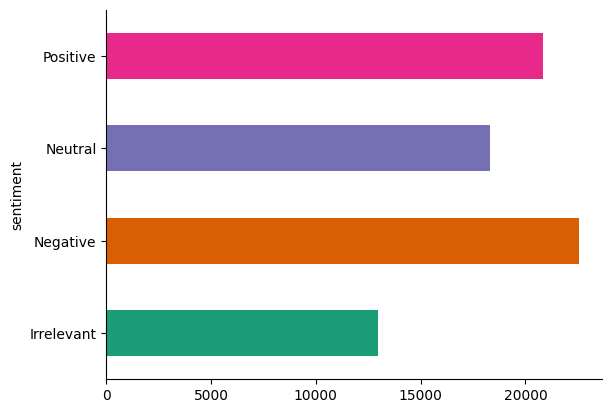

In [9]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
train_data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# Reset index and specify column names
validation_data.reset_index(drop=True, inplace=True)
validation_data.columns = ['ID', 'entity', 'sentiment', 'text']

In [11]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         999 non-null    int64 
 1   entity     999 non-null    object
 2   sentiment  999 non-null    object
 3   text       999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [12]:
validation_data.head(10)

,ID,entity,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


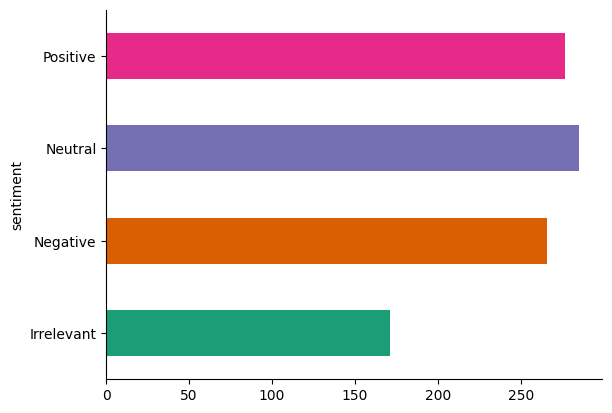

In [13]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
validation_data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
# Concatenate train and validation datasets for preprocessing
full_data = pd.concat([train_data, validation_data], axis=0)

In [15]:
# Reset index after concatenating
full_data.reset_index(drop=True, inplace=True)

In [16]:
full_data.shape

(75680, 4)

In [17]:
def preprocess_text(text):
    if pd.isna(text):
        return ''
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text) # word based tokenization : break down text into smaller units, typically words or subwords, known as tokens.
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [18]:
# Apply preprocessing function to the 'text' column
full_data['preprocessed_text'] = full_data['text'].apply(preprocess_text)

In [19]:
full_data['preprocessed_text']

0                                      coming borders kill
1                              im getting borderlands kill
2                             im coming borderlands murder
3                            im getting borderlands murder
4                            im getting borderlands murder
                               ...                        
75675    toronto arts culture capital canada wonder wan...
75676    actually good move tot bring viewers one peopl...
75677    today sucked time drink wine n play borderland...
75678           bought fraction microsoft today small wins
75679    johnson johnson stop selling talc baby powder ...
Name: preprocessed_text, Length: 75680, dtype: object

In [20]:
print(full_data['sentiment'].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [21]:
# Filter out irrelevant and neutral sentiments
filtered_data = full_data[(full_data['sentiment'] == 'Positive') | (full_data['sentiment'] == 'Negative')]

# Reset index after filtering
filtered_data.reset_index(drop=True, inplace=True)

# Print the shape of the filtered dataset
print("filtered_data.shape:", filtered_data.shape)


filtered_data.shape: (43916, 5)


In [22]:
# Tokenization and converting text to numerical format
# Define maximum number of words to consider
MAX_WORDS = 10000
# Initialize the tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS)
# Fit tokenizer on preprocessed text
tokenizer.fit_on_texts(filtered_data['preprocessed_text'])

In [23]:
# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(filtered_data['preprocessed_text'])
# Define maximum sequence length
MAX_SEQUENCE_LENGTH = 50
# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [24]:
sequences

[[244, 4273, 365],
 [2, 58, 52, 365],
 [2, 244, 52, 1309],
 [2, 58, 52, 1309],
 [2, 58, 52, 1309],
 [538,
  202,
  198,
  125,
  38,
  15,
  43,
  315,
  529,
  2911,
  9,
  166,
  489,
  480,
  41,
  3426,
  162,
  554,
  2093,
  4274,
  6181,
  122,
  340],
 [538,
  714,
  202,
  125,
  38,
  15,
  43,
  2,
  315,
  52,
  529,
  2911,
  9,
  166,
  489,
  480,
  41,
  3426,
  162,
  741,
  554,
  1818,
  1228,
  6181,
  122,
  38,
  130],
 [538, 202, 125, 38, 15, 43, 2, 315, 52, 529, 2911, 9, 166, 489],
 [538,
  202,
  198,
  125,
  38,
  15,
  43,
  315,
  28,
  529,
  2911,
  9,
  166,
  489,
  480,
  41,
  3426,
  162,
  554,
  2093,
  4274,
  6181,
  122,
  340],
 [538,
  202,
  198,
  125,
  38,
  15,
  43,
  315,
  28,
  529,
  2911,
  9,
  166,
  489,
  480,
  41,
  3426,
  162,
  554,
  2093,
  4274,
  6181,
  122,
  340],
 [],
 [50, 52, 1564, 149, 13, 85, 5, 2029, 1497, 323, 16, 5, 7, 615],
 [50, 52, 1564, 149, 13, 85, 5, 2029, 1858, 323, 16, 5, 7, 615],
 [50, 52, 1564, 149,

In [25]:
# Encoding sentiment labels : Initialize label encoder
label_encoder = LabelEncoder()
# Fit label encoder on sentiment labels
label_encoder.fit(filtered_data ['sentiment'])
# Encode sentiment labels
encoded_labels = label_encoder.transform(filtered_data ['sentiment'])

In [26]:
encoded_labels_series = pd.Series(encoded_labels)
unique_labels = encoded_labels_series.unique()
print(unique_labels)

[1 0]


In [27]:
# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the shapes of the preprocessed data
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (28105, 50)
X_val shape: (7027, 50)
y_train shape: (28105,)
y_val shape: (7027,)


## Hyper Parameter Tuning useing GridSearchCV to find the best parameters for the suitable data set to bulid RNN_Model

In [28]:
!pip install scikeras==0.12.0

In [29]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN,LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from scikeras.wrappers import KerasClassifier

In [30]:
# Define RNN model


# Creates a model given an activation and learning rate
def create_model(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'],
                 batch_size=32, validation_batch_size=None, verbose=1, callbacks=None,
                 validation_split=0.0, shuffle=True, run_eagerly=None, epochs=1, class_weight=None):

    model1 = Sequential()
    model1.add(Embedding(input_dim=10000, output_dim=100, input_length=50))
    model1.add(SimpleRNN(units=64))
    model1.add(Dense(units=1, activation='sigmoid'))
    model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model1

In [31]:
# Create KerasClassifier wrapper for use with GridSearchCV
model1 = KerasClassifier(model=create_model, verbose=0)
model1

KerasClassifier(
	model=<function create_model at 0x7824e14145e0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [32]:
# Define hyperparameters for grid search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [100, 200],
    'epochs': [10, 20]
}

In [33]:
# Perform grid search
grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

I0000 00:00:1712909076.065064      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [34]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.881231 using {'batch_size': 200, 'epochs': 10, 'optimizer': 'rmsprop'}
0.871375 (0.008308) with: {'batch_size': 100, 'epochs': 10, 'optimizer': 'adam'}
0.874898 (0.003945) with: {'batch_size': 100, 'epochs': 10, 'optimizer': 'rmsprop'}
0.872407 (0.014496) with: {'batch_size': 100, 'epochs': 20, 'optimizer': 'adam'}
0.860203 (0.011521) with: {'batch_size': 100, 'epochs': 20, 'optimizer': 'rmsprop'}
0.878883 (0.001869) with: {'batch_size': 200, 'epochs': 10, 'optimizer': 'adam'}
0.881231 (0.002718) with: {'batch_size': 200, 'epochs': 10, 'optimizer': 'rmsprop'}
0.876392 (0.007103) with: {'batch_size': 200, 'epochs': 20, 'optimizer': 'adam'}
0.864615 (0.012393) with: {'batch_size': 200, 'epochs': 20, 'optimizer': 'rmsprop'}


In [35]:
# Get the best hyperparameters
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'batch_size': 200, 'epochs': 10, 'optimizer': 'rmsprop'}


In [36]:
# Evaluate the model with the best hyperparameters on the test set
best_model = grid.best_estimator_
best_model

KerasClassifier(
	model=<function create_model at 0x7824e14145e0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=200
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [37]:
y_pred_probs1 = best_model.predict(X_test)
y_pred_classes1 = (y_pred_probs1 > 0.5).astype(int)  # Applying threshold of 0.5 for binary classification

# y_pred_classes is now an array of predicted classes for each sample in X_test


In [38]:
#  Evaluation of test data.
from sklearn.metrics import accuracy_score

Gcv_accuracy = accuracy_score(y_test, y_pred_probs1)*100
print("Test Accuracy:", Gcv_accuracy)

Test Accuracy: 91.49590163934425


In [39]:
# Define the maximum number of words and embedding dimension
MAX_WORDS = 10000
EMBEDDING_DIM = 100

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64))  # Simple RNN layer with 64 units
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 50, 100)           1000000   
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 64)                10560     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1010625 (3.86 MB)
Trainable params: 1010625 (3.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [40]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_delta=0.001)
# ReduceLROnPlateau is a callback that reduces the learning rate when a monitored metric has stopped improving.
# It helps fine-tune the learning rate during training to facilitate convergence to the optimal solution.


In [41]:
# Define hyperparameters
learning_rate = 0.001
batch_size = 200
epochs = 10
hidden_units = 128

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs,callbacks=[reduce_lr])

Epoch 1/10
141/141 [==============================] - 21s 131ms/step - loss: 0.5540 - accuracy: 0.7066 - val_loss: 0.4003 - val_accuracy: 0.8255 - lr: 0.0010
Epoch 2/10
141/141 [==============================] - 12s 83ms/step - loss: 0.3145 - accuracy: 0.8668 - val_loss: 0.3224 - val_accuracy: 0.8621 - lr: 0.0010
Epoch 3/10
141/141 [==============================] - 9s 67ms/step - loss: 0.2208 - accuracy: 0.9110 - val_loss: 0.2495 - val_accuracy: 0.8968 - lr: 0.0010
Epoch 4/10
141/141 [==============================] - 9s 66ms/step - loss: 0.1588 - accuracy: 0.9354 - val_loss: 0.3411 - val_accuracy: 0.8689 - lr: 0.0010
Epoch 5/10
141/141 [==============================] - 8s 59ms/step - loss: 0.1369 - accuracy: 0.9427 - val_loss: 0.2500 - val_accuracy: 0.9019 - lr: 0.0010
Epoch 6/10
141/141 [==============================] - 8s 56ms/step - loss: 0.0928 - accuracy: 0.9594 - val_loss: 0.2253 - val_accuracy: 0.9099 - lr: 2.0000e-04
Epoch 7/10
141/141 [==============================] - 7s 

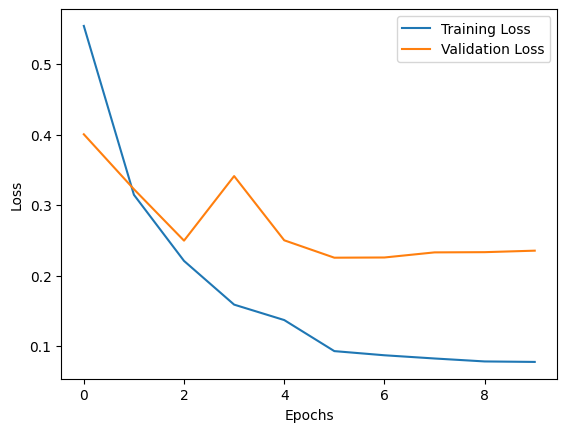

In [42]:
# Visualize training metrics
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

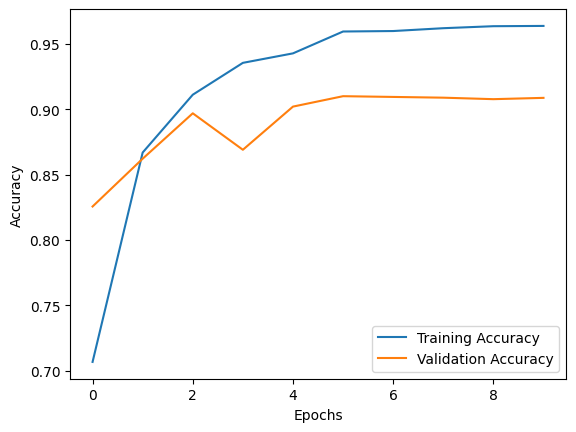

In [43]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [44]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

44/44 [==============================] - 0s 6ms/step - loss: 0.2448 - accuracy: 0.9114
Test Loss: 0.24482035636901855
Test Accuracy: 0.9114298820495605


In [45]:
# 1. Save the Trained Model
model.save('my_model.keras')

In [46]:
import joblib
# Save tokenizer to file
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

In [47]:
joblib.dump(model, 'model.pkl')

['model.pkl']